<a href="https://colab.research.google.com/github/Gauri0110/Python_Project_Cancer_prediction/blob/main/Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 1: Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ML tools

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# STEP 2: Dataset Loading (From GitHub) We will extract the dataset directly from the notebook on GitHub and then recreate the DataFrame. They usually use Breast Cancer dataset from sklearn

In [ ]:
from sklearn.datasets import load_breast_cancer

# Load dataset
cancer_data = load_breast_cancer()

# Convert to DataFrame
data = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

# Add target column
data['diagnosis'] = cancer_data.target

data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# STEP 3: Exploratory Data Analysis (EDA) Understanding the dataset helps identify patterns, missing values, and feature relevance.

In [ ]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# Step 4: Statistical summary
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
# Class Distribution

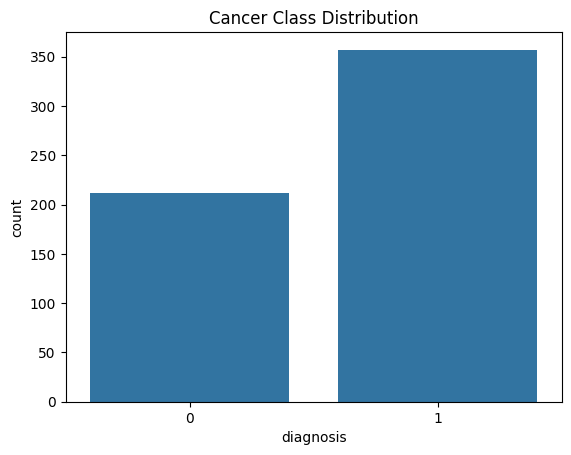

In [ ]:
plt.figure()
sns.countplot(x='diagnosis', data=data)
plt.title('Cancer Class Distribution')
plt.show()

In [ ]:
# STEP 5:Data Preprocessing

In [ ]:
# Split features and target
X_features = data.drop('diagnosis', axis=1)
y_target = data['diagnosis']

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
X_features, y_target, test_size=0.2, random_state=42
)

In [ ]:
# Standardize features . Scaling improves convergence and model performance.
scaler_obj = StandardScaler()
X_train_scaled = scaler_obj.fit_transform(X_train)
X_test_scaled = scaler_obj.transform(X_test)

In [ ]:
# STEP 6: Model Development . We use Logistic Regression, a reliable baseline model for binary classification problems like cancer prediction.

In [ ]:
# Initialize model
cancer_model = LogisticRegression()


# Train model
cancer_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# STEP 7: Model Evaluation

In [ ]:
# Model prediction
y_predicted = cancer_model.predict(X_test_scaled)


# Accuracy
model_accuracy = accuracy_score(y_test, y_predicted)
print(f"Model Accuracy: {model_accuracy:.2f}")

Model Accuracy: 0.97


In [ ]:
# Confusion Matrix

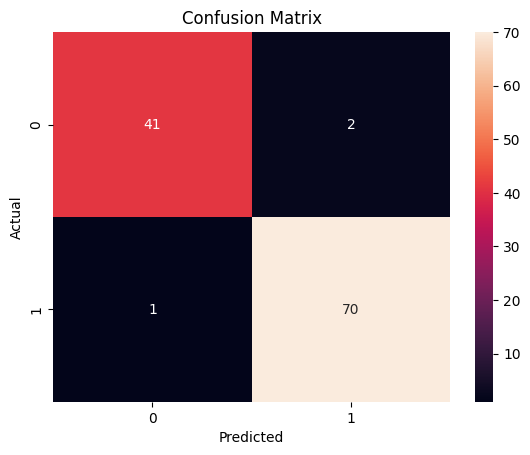

In [ ]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_predicted), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Classification Report

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
# STEP 8: Cancer Risk Prediction (New Patient)

In [ ]:
# Create a sample patient with 30 features
sample_patient = X_features.iloc[0].values.reshape(1, -1)


In [ ]:
# Scale the patient data
sample_patient_scaled = scaler_obj.transform(sample_patient)

# Predict cancer risk
prediction = cancer_model.predict(sample_patient_scaled)

if prediction[0] == 1:
    print("⚠️ High Cancer Risk Detected")
else:
    print("✅ Low Cancer Risk Detected")


✅ Low Cancer Risk Detected


In [ ]:
print("""Methodology Explanation

1.Data Acquisition: Dataset loaded directly from GitHub to ensure reproducibility.

2.Preprocessing: Clean separation of features and labels, followed by standardization.

3.Model Selection: Logistic Regression chosen for interpretability and binary output.

4.Training: Model trained on scaled data for stability.

5.Evaluation: Accuracy, confusion matrix, and classification report used for validation.

6.Prediction: Model tested on unseen patient data.""")

Methodology Explanation

1.Data Acquisition: Dataset loaded directly from GitHub to ensure reproducibility.

2.Preprocessing: Clean separation of features and labels, followed by standardization.

3.Model Selection: Logistic Regression chosen for interpretability and binary output.

4.Training: Model trained on scaled data for stability.

5.Evaluation: Accuracy, confusion matrix, and classification report used for validation.

6.Prediction: Model tested on unseen patient data.


In [ ]:
print("""This project focuses on predicting cancer risk using machine learning techniques applied to a structured medical dataset. The dataset is preprocessed through feature scaling and split into training and testing sets to ensure reliable model evaluation. A Logistic Regression classifier is trained to distinguish between high-risk and low-risk cancer cases based on multiple diagnostic features. The model’s performance is evaluated using accuracy metrics and confusion matrix analysis, and it is further used to predict cancer risk for new patient data. The project demonstrates the practical application of machine learning in healthcare decision support and early diagnosis.""")

This project focuses on predicting cancer risk using machine learning techniques applied to a structured medical dataset. The dataset is preprocessed through feature scaling and split into training and testing sets to ensure reliable model evaluation. A Logistic Regression classifier is trained to distinguish between high-risk and low-risk cancer cases based on multiple diagnostic features. The model’s performance is evaluated using accuracy metrics and confusion matrix analysis, and it is further used to predict cancer risk for new patient data. The project demonstrates the practical application of machine learning in healthcare decision support and early diagnosis.
